# Deep Learning

## Part 1: Image Classification - Fashion MNIST

---
> Kostis Konstantinos (p3352311) <br>
> Karousis Nikolaos (p3352321) <br>
> MSc Data Science (Part-Time) <br>
> Athens University Of Economics and Business

In [ ]:
# Install needed libraries
!pip install tensorflow==2.12.0 keras-tuner==1.4.7 pandas==1.5.3 numpy==1.23.5 scikit-learn==1.3.0 matplotlib==3.8.4

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 71.5 MB/s eta 0:00:00
   ━━━━

In [ ]:
## Allow access to the code directory
import sys
import os
from google.colab import drive

# Mount the drive
drive.mount('/content/drive', force_remount=True)

# Define the base path
base_path = '/content/drive/MyDrive/deep-learning-msc-data-science-2024-2025'

# Define the code path
code_folder = os.path.join(base_path, 'code')

# Add the 'code' folder to the sys.path
sys.path.append(code_folder)

Mounted at /content/drive


In [ ]:
# Load necessary libs and modules
from constants import *
from fashion_mnist_downloader import FashioMNISTDownloader
from fashion_mnist_loader import FashionMnistLoader
from mlp import MLPTuner, MLP

## Multi Layer Perceptron (section)

### Download the data

In [ ]:
fashion_mnist_path = os.path.join(base_path, FASHION_MNIST_DATA_PATH)
fashion_mnist_downloader = FashioMNISTDownloader(fashion_mnist_path)
fashion_mnist_downloader.download()

### Load the data

In [ ]:
train_loader = FashionMnistLoader(fashion_mnist_path, 'train')
train_set, validation_set = train_loader.load_data(validation_size=0.1)
train_X, train_y = train_set
validation_X, validation_y = validation_set

test_loader = FashionMnistLoader(fashion_mnist_path, 't10k')
test_X, test_y = test_loader.load_data()
test_set = (test_X, test_y)

### MLP Hyper-Parameter tuning

In [ ]:
tuner_directory = os.path.join(base_path, TUNERS_DIR)
fashion_mlp_tuner = MLPTuner(train_set, validation_set,
                             tuner_directory, FASHION_MNIST_MLP_TUNER_PROJECT_NAME,
                             train_size=0.5)

In [ ]:
fashion_mlp_keras_tuner = fashion_mlp_tuner.tune()

Trial 10 Complete [00h 00m 44s]
val_loss: 0.3380378484725952

Best val_loss So Far: 0.30579233169555664
Total elapsed time: 00h 06m 11s


In [ ]:
fashion_mlp_best_hyperparams = fashion_mlp_keras_tuner.get_best_hyperparameters()[0].values
fashion_mlp_best_hyperparams

{'num_layers': 2,
 'hidden_units_0': 192,
 'activation_layer_0': 'relu',
 'dropout_layer_0': 0.3,
 'learning_rate': 0.001,
 'hidden_units_1': 64,
 'activation_layer_1': 'tanh',
 'dropout_layer_1': 0.2}

### MLP Best Model Architecture

In [ ]:
fashion_mlp_keras_tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               150720    
                                                                 
 dropout (Dropout)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                12352     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 163,722
Trainable params: 163,722
Non-trainable params: 0
_________________________________________________________________


### Fit the MLP

In [ ]:
models_directory = os.path.join(base_path, MODELS_DIR)
fashion_mlp = MLP(models_dir=models_directory, weights_name=FASHION_MNIST_MLP_WEIGHTS,
                  class_ids=FASHION_MNIST_CLASS_IDS, class_labels=FASHION_MNIST_CLASS_LABELS)

In [ ]:
fashion_mlp.fit(train_dataset=train_set, validation_dataset=validation_set, hyperparams=fashion_mlp_best_hyperparams)

Epoch 1/100
188/188 [==============================] - 0s 2ms/step
 — val_f1: 0.846144 — val_precision: 0.853644 — val_recall: 0.851500

Epoch 1: val_f1 improved from -inf to 0.84614, saving model to /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/models/fashion_mnist_mlp.weights.h5
422/422 [==============================] - 4s 7ms/step - loss: 0.6794 - categorical_accuracy: 0.7616 - val_loss: 0.4098 - val_categorical_accuracy: 0.8515 - val_f1: 0.8461 - val_recall: 0.8515 - val_precision: 0.8536
Epoch 2/100
188/188 [==============================] - 0s 2ms/step
 — val_f1: 0.867829 — val_precision: 0.870608 — val_recall: 0.867333

Epoch 2: val_f1 improved from 0.84614 to 0.86783, saving model to /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/models/fashion_mnist_mlp.weights.h5
422/422 [==============================] - 3s 8ms/step - loss: 0.4596 - categorical_accuracy: 0.8354 - val_loss: 0.3624 - val_categorical_accuracy: 0.8673 - val_f1: 0.8678 - val_re

### Plot training accuracy and loss curves

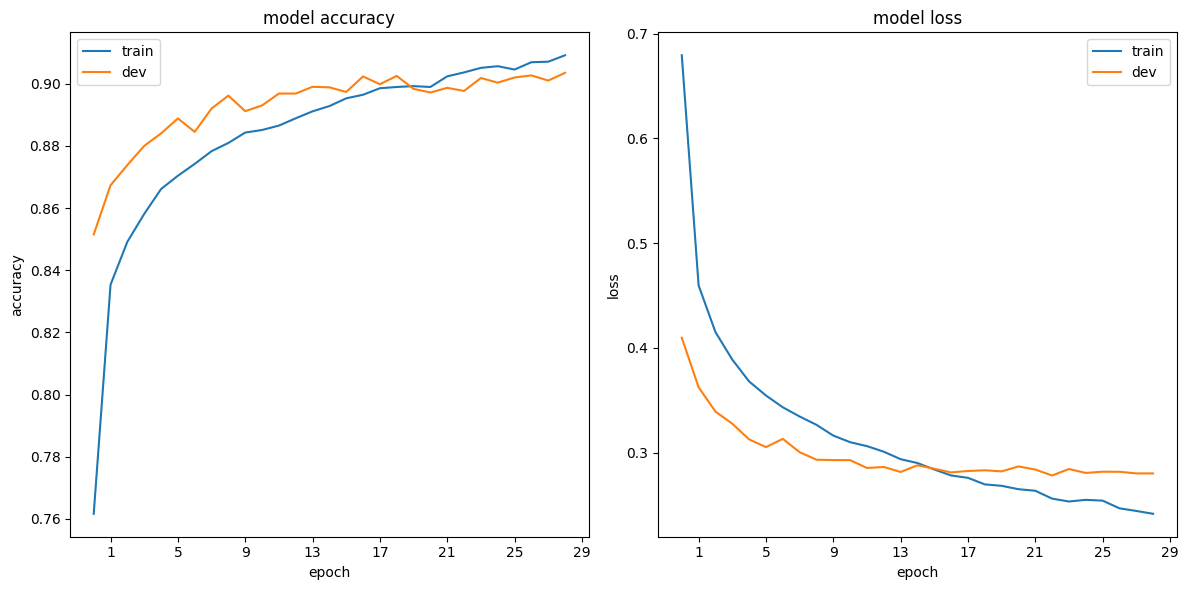

In [ ]:
fashion_mlp.plot_curves()

### Evaluating the MLP on the training set (Classification Report)

In [ ]:
train_classification_report_df, train_macro_average_df = fashion_mlp.classification_report(train_set)

1688/1688 [==============================] - 2s 1ms/step


In [ ]:
train_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,T-shirt/top,0.876344,0.875370,0.875857,0.953081
1,1,Trouser,0.997184,0.983704,0.990398,0.999317
2,2,Pullover,0.888408,0.799074,0.841377,0.928379
3,3,Dress,0.914085,0.939815,0.926771,0.979221
4,4,Coat,0.832676,0.860741,0.846476,0.921972
5,5,Sandal,0.981370,0.995000,0.988138,0.999576
6,6,Shirt,0.741958,0.785926,0.763309,0.868952
7,7,Sneaker,0.965884,0.975185,0.970512,0.996372
8,8,Bag,0.991259,0.987037,0.989144,0.999057
9,9,Ankle boot,0.986512,0.961667,0.973931,0.997684


In [ ]:
train_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.917568,0.916352,0.916591,0.964361


### Evaluating the MLP on the validation set (Classification Report)

In [ ]:
val_classification_report_df, val_macro_average_df = fashion_mlp.classification_report(validation_set)

188/188 [==============================] - 0s 1ms/step


In [ ]:
val_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,T-shirt/top,0.856187,0.853333,0.854758,0.932121
1,1,Trouser,0.993266,0.983333,0.988275,0.998891
2,2,Pullover,0.878957,0.786667,0.830255,0.904014
3,3,Dress,0.905145,0.938333,0.921440,0.973458
4,4,Coat,0.826733,0.835000,0.830846,0.882147
5,5,Sandal,0.962662,0.988333,0.975329,0.996679
6,6,Shirt,0.706154,0.765000,0.734400,0.827156
7,7,Sneaker,0.961538,0.958333,0.959933,0.989063
8,8,Bag,0.979798,0.970000,0.974874,0.996260
9,9,Ankle boot,0.970940,0.946667,0.958650,0.990622


In [ ]:
val_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.904138,0.9025,0.902876,0.949041


### Evaluating the MLP on the test set (Classification Report)

In [ ]:
test_classification_report_df, test_macro_average_df = fashion_mlp.classification_report(test_set)

313/313 [==============================] - 0s 1ms/step


In [ ]:
test_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,T-shirt/top,0.844287,0.835,0.839618,0.915309
1,1,Trouser,0.992821,0.968,0.980253,0.995901
2,2,Pullover,0.839602,0.759,0.797269,0.883794
3,3,Dress,0.866029,0.905,0.885086,0.957386
4,4,Coat,0.789679,0.811,0.800197,0.880780
5,5,Sandal,0.962525,0.976,0.969215,0.997204
6,6,Shirt,0.677054,0.717,0.696455,0.795086
7,7,Sneaker,0.934442,0.955,0.944609,0.989715
8,8,Bag,0.974975,0.974,0.974487,0.995268
9,9,Ankle boot,0.977226,0.944,0.960326,0.993245


In [ ]:
test_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.885864,0.8844,0.884752,0.940369


## Remarks

On the test set, using the `Precision-Recall AUC` per class, it is evident that the most difficult class to predict is `Shirt`. `Coat` and `Pullover` can be considered as the next difficult classes if we consider a threshold of 0.9.